In [0]:
%matplotlib inline

In [0]:
pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 2.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/47/d1/ba/1a686af7cc042edde2c2f4cb18bd981f7eefdcbfe688590d25
Successfully built japanize-matplotlib


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
import japanize_matplotlib 

In [0]:
n = 50
p = 0.05
x = np.arange(0, n+1)
y = scipy.stats.binom.pmf(x, n, p)

rv = scipy.stats.binom(n, p)
cdf = rv.cdf(x)

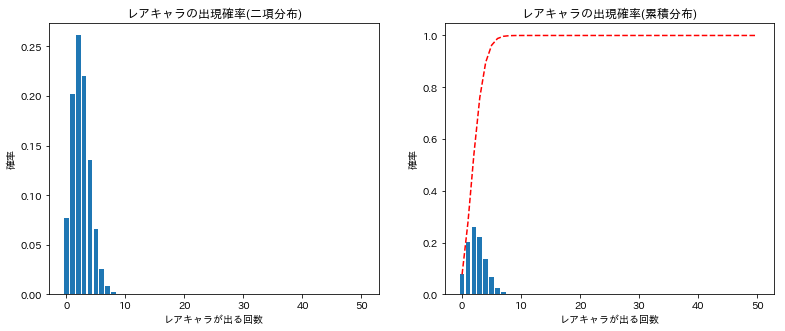

In [0]:
fig = plt.figure(figsize=(13, 5))

plt.subplot(1,2,1)
plt.bar(x, y)
plt.title('レアキャラの出現確率(二項分布)')
plt.xlabel('レアキャラが出る回数')
plt.ylabel('確率')

plt.subplot(1,2,2)
plt.bar(x, y)
plt.plot(x, cdf,'r--')
plt.title('レアキャラの出現確率(累積分布)')
plt.xlabel('レアキャラが出る回数')
plt.ylabel('確率')

plt.show()

In [0]:
p_value = pd.DataFrame({'レアキャラが出る回数':x, '確率': y}).query('レアキャラが出る回数 == 0')['確率'].sum()
print('{:,.4f}'.format(p_value))

0.0769


有意水準が0.05のとき、P値は0.0769のため、ガチャを50回まわしてレアキャラが1回も出現しない(0回)という帰無仮説は棄却されない。よって、レアキャラが出現しないのは異常とはいえない。

In [0]:
p_value = pd.DataFrame({'レアキャラが出る回数':x, '確率': y}).query('レアキャラが出る回数 >= 6')['確率'].sum()
print('{:,.4f}'.format(p_value))

0.0378


有意水準が0.05のとき、P値は0.0378のため、ガチャを50回まわしてレアキャラが6回出るという帰無仮説は棄却される。よって、ガチャを50回まわしてレアキャラが6回出るのは異常といえる。

有意水準が0.01のとき、P値は0.0378のため、ガチャを50回まわしてレアキャラが6回出るのは異常といえない。
